In [7]:
import pandas as pd

import config

In [8]:
df = pd.read_csv(config.SYNTHETIC_DATASET_ARTIFACT, index_col=0)

df.head()

hash  \
0  9a581830e4fa02eed501b4e1f546a2e2ea358e13   
1  37067a53c4b3b99982ef8e1f431ba0c9302b66e8   
2  82e350064cb8d1622c7cde275567ae594483fe62   
3  cf98f5e3705603ae21bef9b0a577bcd001a8c92e   
4  c17a80f47b772d759aeb0878aa767a768a6fdd0c   

                                repo  \
0  bitcoinunlimited/bitcoinunlimited   
1                   mesonbuild/meson   
2             mycroftai/mycroft-core   
3                   mesonbuild/meson   
4                   mesonbuild/meson   

                                    commit_msg_start  \
0  Add extensive test option to parallel RPC test...   
1  Refactor argument parsing and command executio...   
2  Add helper functions for disk space management...   
3  Update path resolution for non-Windows systems...   
4  Add support for VS2017 architecture detection\...   

                                      commit_msg_end  \
0  Add new block attack patterns\n\n- Added test ...   
1  Introduce unified argument parsing in meson\n\...   
2  Refactor file_utils.py\n\n- Add helper functio...   
3  Enable loading crossfiles for all platforms ex...   
4  Add support for VS2017 architecture detection....   

                                session  \
0  032e60d7-621a-46b6-972f-7590cfaf6458   
1  5d7f1209-4ed9-4620-87ca-975f029c7f6f   
2  93b1c57c-e56c-4d75-89a6-ae1158b4fa74   
3  5d7f1209-4ed9-4620-87ca-975f029c7f6f   
4  16e57250-21ff-4cdd-ae0d-760cabcc6160   

                                  commit_msg_history  \
0  [{"t": "-", "p": 4, "c": "e", "ts": "2024-04-0...   
1                                                 []   
2  [{"t": "+", "p": 0, "c": "R", "ts": "2024-04-0...   
3                                                 []   
4  [{"t": "-", "p": 45, "c": "\n", "ts": "2024-04...   

                    loaded_ts                submitted_ts  edit_time_hist  \
0  2024-04-04T19:48:31.180017  2024-04-04T19:50:32.925989         59468.0   
1  2024-04-15T16:50:17.208813  2024-04-15T15:29:02.014310             0.0   
2  2024-04-04T19:52:38.276314  2024-04-04T19:57:02.449096        133655.0   
3  2024-04-15T17:42:14.482856  2024-04-15T15:29:02.014310             0.0   
4  2024-04-15T15:47:31.022477  2024-04-15T15:53:08.796895        163218.0   

   edit_time  ... rel_edittime_ind_rouge2_pearson  \
0   121745.0  ...                        0.281944   
1        NaN  ...                        0.281944   
2   264172.0  ...                        0.281944   
3        NaN  ...                        0.281944   
4   337774.0  ...                        0.281944   

   rel_edittime_ind_rouge2_spearman  rel_edittime_ind_rougeL_pearson  \
0                          0.218822                         0.091196   
1                          0.218822                         0.091196   
2                          0.218822                         0.091196   
3                          0.218822                         0.091196   
4                          0.218822                         0.091196   

  rel_edittime_ind_rougeL_spearman  rel_edittime_ind_bertscore_pearson  \
0                         0.071344                            0.158807   
1                         0.071344                            0.158807   
2                         0.071344                            0.158807   
3                         0.071344                            0.158807   
4                         0.071344                            0.158807   

   rel_edittime_ind_bertscore_spearman  rel_edittime_ind_chrF_pearson  \
0                             0.140481                       0.184202   
1                             0.140481                       0.184202   
2                             0.140481                       0.184202   
3                             0.140481                       0.184202   
4                             0.140481                       0.184202   

   rel_edittime_ind_chrF_spearman  rel_edittime_ind_ter_pearson  \
0                        0.079802                      0.062616   
1           

In [6]:
len(set(df['session'].to_list()))

9

In [15]:
rel_metrics = [col.split("_")[0] for col in df.columns if col.endswith("_related")]
rel_metrics

['editdist', 'edittime']

In [16]:
ind_metrics = [col.split("_")[0] for col in df.columns if col.endswith("_independent")]
ind_metrics

['gptscore-ref-1-req',
 'gptscore-noref-1-req',
 'editdist',
 'bleu',
 'meteor',
 'rouge1',
 'rouge2',
 'rougeL',
 'bertscore',
 'chrF',
 'ter']

In [19]:
AGGREGATION = {"hash": ["count"]}

for metric in rel_metrics:
    AGGREGATION[f"{metric}_related"] = ["mean"]

for metric in ind_metrics:
    AGGREGATION[f"{metric}_independent"] = ["mean"]

df.groupby(by=["end_to_start", "start_to_end"]).agg(AGGREGATION)

hash editdist_related edittime_related  \
                          count             mean             mean   
end_to_start start_to_end                                           
False        False           43       355.441860      364099.0625   
             True           129       406.627907              NaN   
True         False          129       433.899225              NaN   
             True           387       444.509044              NaN   

                          gptscore-ref-1-req_independent  \
                                                    mean   
end_to_start start_to_end                                  
False        False                              7.255814   
             True                               7.217054   
True         False                              7.356589   
             True                               7.312661   

                          gptscore-noref-1-req_independent  \
                                                      mean   
end_to_start start_to_end                                    
False        False                                8.116279   
             True                                 8.178295   
True         False                                8.302326   
             True                                 8.276486   

                          editdist_independent bleu_independent  \
                                          mean             mean   
end_to_start start_to_end                                         
False        False                  491.069767         0.012805   
             True                   491.069767         0.012805   
True         False                  534.015504         0.009542   
             True                   534.015504         0.009542   

                          meteor_independent rouge1_independent  \
                                        mean               mean   
end_to_start start_to_end                                         
False        False                  0.224961           0.202063   
             True                   0.224961           0.202063   
True         False                  0.221893           0.205151   
             True                   0.221893           0.205151   

                          rouge2_independent rougeL_independent  \
                                        mean               mean   
end_to_start start_to_end                                         
False        False                  0.040718           0.136427   
             True                   0.040718           0.136427   
True         False                  0.039033           0.134114   
             True                   0.039033           0.134114   

                          bertscore_independent chrF_independent  \
                                           mean             mean   
end_to_start start_to_end                                          
False        False                     0.780266        32.067005   
             True                      0.780266        32.067005   
True         False                     0.777162        31.753065   
             True                      0.777162        31.753065   

                          ter_independent  
                                     mean  
end_to_start start_to_end                  
False        False             312.732989  
             True              312.732989  
True         False             317.717517  
             True              317.717517

all              golden            \
                               spearman   pearson  spearman   pearson   
relative independent                                                    
editdist bertscore            -0.184962 -0.129057 -0.316215 -0.254700   
         bleu                  0.260118  0.185995  0.269028  0.259690   
         chrF                 -0.199200 -0.129029 -0.343201 -0.300656   
         editdist              0.909934  0.910641  0.710772  0.662808   
         gptscore-noref-1-req  0.032048  0.055364  0.155510  0.048588   
         gptscore-ref-1-req    0.024550  0.035295 -0.009830 -0.062574   
         meteor                0.336016  0.371949  0.068034  0.173237   
         rouge1               -0.077574 -0.043738 -0.187349 -0.163230   
         rouge2                0.414256  0.340732  0.276139  0.332087   
         rougeL                0.006513 -0.008078 -0.041502 -0.034867   
         ter                   0.618095  0.385515  0.575614  0.501385   
edittime bertscore             0.140481  0.158807  0.140481  0.158807   
         bleu                  0.302380  0.326167  0.302380  0.326167   
         chrF                  0.079802  0.184202  0.079802  0.184202   
         editdist              0.252645  0.411131  0.252645  0.411131   
         gptscore-noref-1-req  0.206465  0.026235  0.206465  0.026235   
         gptscore-ref-1-req    0.130419 -0.055218  0.130419 -0.055218   
         meteor                0.253380  0.403564  0.253380  0.403564   
         rouge1                0.155926  0.136971  0.155926  0.136971   
         rouge2                0.218822  0.281944  0.218822  0.281944   
         rougeL                0.071344  0.091196  0.071344  0.091196   
         ter                   0.305601  0.062616  0.305601  0.062616   

                                   +s2e                +e2s            \
                               spearman   pearson  spearman   pearson   
relative independent                                                    
editdist bertscore            -0.308494 -0.113525 -0.181393 -0.165924   
         bleu                  0.512841  0.502827  0.109831  0.068138   
         chrF                 -0.238124 -0.064922 -0.233123 -0.201726   
         editdist              0.950494  0.935064  0.861930  0.878118   
         gptscore-noref-1-req  0.067857  0.047215 -0.029048 -0.013128   
         gptscore-ref-1-req   -0.015178 -0.036001  0.071345  0.087584   
         meteor                0.203616  0.425775  0.372598  0.360051   
         rouge1               -0.139874 -0.065543 -0.082093 -0.035603   
         rouge2                0.523559  0.537560  0.323911  0.282872   
         rougeL               -0.022288 -0.004664  0.012409  0.016372   
         ter                   0.774086  0.462554  0.529338  0.388592   
edittime bertscore                  NaN       NaN       NaN       NaN   
         bleu                       NaN       NaN       NaN       NaN   
         chrF                       NaN       NaN       NaN       NaN   
         editdist                   NaN       NaN       NaN       NaN   
         gptscore-noref-1-req       NaN       NaN       NaN       NaN   
         gptscore-ref-1-req         NaN       NaN       NaN       NaN   
         meteor                     NaN       NaN       NaN       NaN   
         rouge1                     NaN       NaN       NaN       NaN   
         rouge2                     NaN       NaN       NaN       NaN   
         rougeL                     NaN       NaN       NaN       NaN   
         ter                        NaN       NaN       NaN       NaN   

                               +e2s+s2e            
                               spearman   pearson  
relative independent                               
editdist bertscore            -0.135421 -0.091748  
         bleu                  0.229712  0.145062  
         chrF                 -0.156914 -0.093376  
         editdist              0.939318  0.962305  
         gptscore-no

In [50]:
from analysis_util import get_correlations_for_groups

get_correlations_for_groups(df, right_side="ind")

all              golden            \
                               spearman   pearson  spearman   pearson   
relative independent                                                    
editdist bertscore            -0.184962 -0.129057 -0.316215 -0.254700   
         bleu                  0.260118  0.185995  0.269028  0.259690   
         chrF                 -0.199200 -0.129029 -0.343201 -0.300656   
         editdist              0.909934  0.910641  0.710772  0.662808   
         gptscore-noref-1-req  0.032048  0.055364  0.155510  0.048588   
         gptscore-ref-1-req    0.024550  0.035295 -0.009830 -0.062574   
         meteor                0.336016  0.371949  0.068034  0.173237   
         rouge1               -0.077574 -0.043738 -0.187349 -0.163230   
         rouge2                0.414256  0.340732  0.276139  0.332087   
         rougeL                0.006513 -0.008078 -0.041502 -0.034867   
         ter                   0.618095  0.385515  0.575614  0.501385   
edittime bertscore             0.140481  0.158807  0.140481  0.158807   
         bleu                  0.302380  0.326167  0.302380  0.326167   
         chrF                  0.079802  0.184202  0.079802  0.184202   
         editdist              0.252645  0.411131  0.252645  0.411131   
         gptscore-noref-1-req  0.206465  0.026235  0.206465  0.026235   
         gptscore-ref-1-req    0.130419 -0.055218  0.130419 -0.055218   
         meteor                0.253380  0.403564  0.253380  0.403564   
         rouge1                0.155926  0.136971  0.155926  0.136971   
         rouge2                0.218822  0.281944  0.218822  0.281944   
         rougeL                0.071344  0.091196  0.071344  0.091196   
         ter                   0.305601  0.062616  0.305601  0.062616   

                                   +s2e                +e2s            \
                               spearman   pearson  spearman   pearson   
relative independent                                                    
editdist bertscore            -0.308494 -0.113525 -0.181393 -0.165924   
         bleu                  0.512841  0.502827  0.109831  0.068138   
         chrF                 -0.238124 -0.064922 -0.233123 -0.201726   
         editdist              0.950494  0.935064  0.861930  0.878118   
         gptscore-noref-1-req  0.067857  0.047215 -0.029048 -0.013128   
         gptscore-ref-1-req   -0.015178 -0.036001  0.071345  0.087584   
         meteor                0.203616  0.425775  0.372598  0.360051   
         rouge1               -0.139874 -0.065543 -0.082093 -0.035603   
         rouge2                0.523559  0.537560  0.323911  0.282872   
         rougeL               -0.022288 -0.004664  0.012409  0.016372   
         ter                   0.774086  0.462554  0.529338  0.388592   
edittime bertscore                  NaN       NaN       NaN       NaN   
         bleu                       NaN       NaN       NaN       NaN   
         chrF                       NaN       NaN       NaN       NaN   
         editdist                   NaN       NaN       NaN       NaN   
         gptscore-noref-1-req       NaN       NaN       NaN       NaN   
         gptscore-ref-1-req         NaN       NaN       NaN       NaN   
         meteor                     NaN       NaN       NaN       NaN   
         rouge1                     NaN       NaN       NaN       NaN   
         rouge2                     NaN       NaN       NaN       NaN   
         rougeL                     NaN       NaN       NaN       NaN   
         ter                        NaN       NaN       NaN       NaN   

                               +e2s+s2e            
                               spearman   pearson  
relative independent                               
editdist bertscore            -0.135421 -0.091748  
         bleu                  0.229712  0.145062  
         chrF                 -0.156914 -0.093376  
         editdist              0.939318  0.962305  
         gptscore-no

In [ ]:
get_correlations_for_groups(df, right_side="aggr")

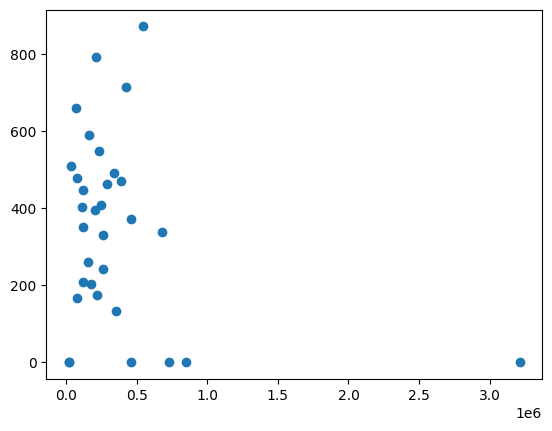

In [11]:
from matplotlib import pyplot as plt

plt.scatter(x=df['edittime_related'], y=df['editdist_related'])